In [1]:
%cd ~/src/laboratori/0708

/home/jovyan/src/laboratori/0708


# **Introduzione al Machine Learning -- laboratorio 7 e 8**

Importa la funzione `fetch_ucirepo` dalla libreria `ucimlrepo` e scarica il dataset Iris (ID 53) dal repository UCI.

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)


Mostra le chiavi principali disponibili nell'oggetto `iris` restituito da `fetch_ucirepo`. Queste chiavi tipicamente includono 'data', 'metadata', 'variables'.

In [3]:
iris.keys()

dict_keys(['data', 'metadata', 'variables'])

Accede e visualizza il contenuto della chiave 'data', che solitamente contiene le features e i target del dataset.

In [4]:
iris['data'] # oppure iris.data

{'ids': None,
 'features':      sepal length  sepal width  petal length  petal width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 'targets':               class
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virgini

Visualizza i metadati associati al dataset Iris, come nome, descrizione, fonte, ecc.

In [5]:
iris['metadata']

{'uci_id': 53,
 'name': 'Iris',
 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris',
 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv',
 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 150,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1936,
 'last_updated': 'Tue Sep 12 2023',
 'dataset_doi': '10.24432/C56C76',
 'creators': ['R. A. Fisher'],
 'intro_paper': {'ID': 191,
  'type': 'NATIVE',
  'title': 'The Iris data set: In search of the source of virginica',
  'authors': 'A. Unwin, K. Kleinman',
  'venue': 'Significance, 2021',
  'year': 2021,
  'journal': 'Significance, 2021',
  'DOI': '1740-9713.01589',
  'UR

Mostra le informazioni dettagliate sulle variabili (colonne) del dataset, come nomi, tipi, descrizioni.

In [6]:
iris['variables']

name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no

Importa la libreria `pandas`. Estrae le features (variabili indipendenti) in un DataFrame `X` e i target (variabile dipendente/classe) in un DataFrame `y`.

In [7]:
import pandas as pd
# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# # metadata
# print(iris.metadata)

# # variable information
# print(iris.variables)

Visualizza le prime righe del DataFrame `X` contenente le features.

In [8]:
X

sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

Visualizza le prime righe del DataFrame `y` contenente i target.

In [9]:
y

class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]

Estrae la colonna 'class' dal DataFrame `y` e la converte in una Series pandas. Verifica e mostra il tipo della nuova variabile `y`.

In [10]:
y = y['class'] # trasformo il dataframe in series
type(y)

pandas.core.series.Series

Mostra i valori unici presenti nella Series `y`, che corrispondono alle diverse classi del dataset Iris.

In [11]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Calcola e visualizza il numero di occorrenze per ciascuna classe nella Series `y`.

In [12]:
y.value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Genera un box plot per ciascuna colonna numerica del DataFrame `X` utilizzando il metodo `.plot.box()` di pandas. La linea verde nel box plot rappresenta la mediana.

<Axes: >

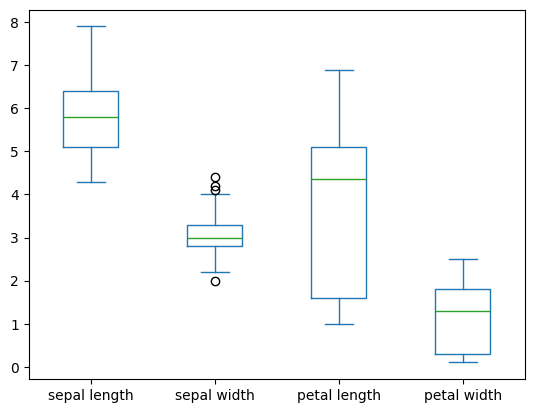

In [13]:
X.plot.box()
# in verde la mediana

Genera un istogramma per ciascuna colonna numerica del DataFrame `X` per visualizzare la distribuzione di frequenza dei valori.

<Axes: ylabel='Frequency'>

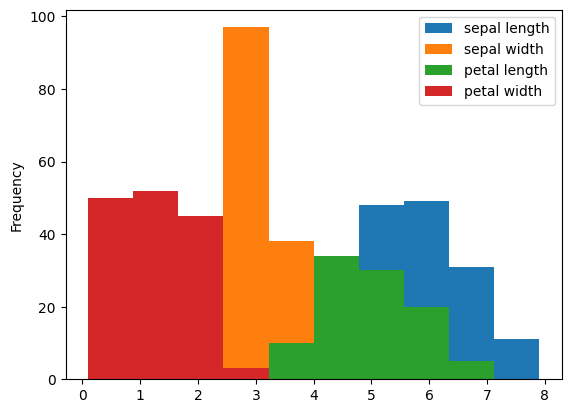

In [14]:
X.plot.hist()

Genera un grafico della stima della densità del kernel (KDE) per ciascuna colonna numerica di `X`. Il KDE è una stima smussata della funzione di densità di probabilità.

<Axes: ylabel='Density'>

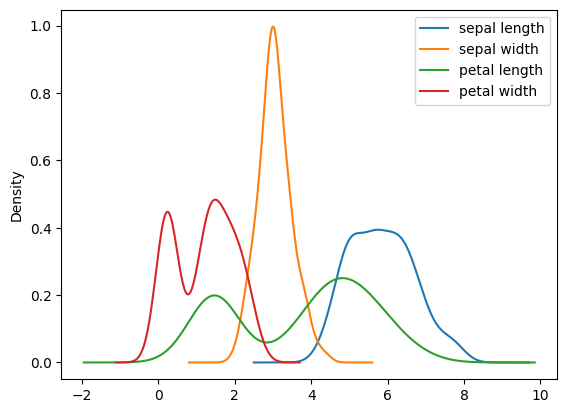

In [15]:
X.plot.kde()

Genera nuovamente il grafico KDE, ma specificando una larghezza di banda (`bw_method`) più piccola (0.1). Questo produce una stima della densità più dettagliata e meno smussata.

<Axes: ylabel='Density'>

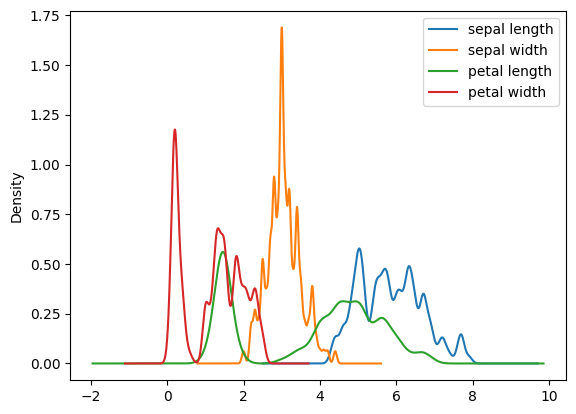

In [16]:
X.plot.kde(bw_method=.1)

Importa la libreria `seaborn` e utilizza la funzione `violinplot` per creare un grafico a violino per le colonne numeriche del DataFrame `X`. Questo grafico combina un box plot con una stima della densità del kernel.

<Axes: >

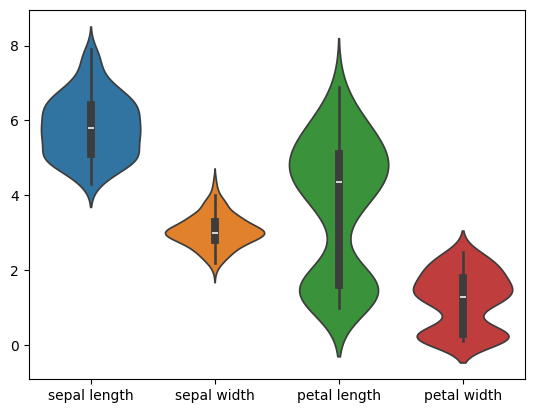

In [17]:
import seaborn as sns

sns.violinplot(data=X)

Importa `matplotlib.pyplot`. Itera su ciascuna colonna (variabile) del DataFrame `X` e ne traccia la funzione di distribuzione cumulativa empirica (ECDF) usando `plt.ecdf`. Aggiunge una legenda e mostra il grafico.

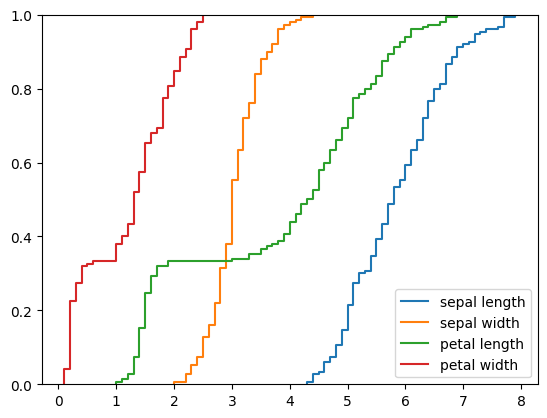

In [18]:
import matplotlib.pyplot as plt

for variable in X.columns:
    plt.ecdf(X[variable], label=variable)
plt.legend()
plt.show()

Genera uno scatter plot (grafico a dispersione) utilizzando `matplotlib` per visualizzare la relazione tra le features 'sepal length' e 'sepal width'.

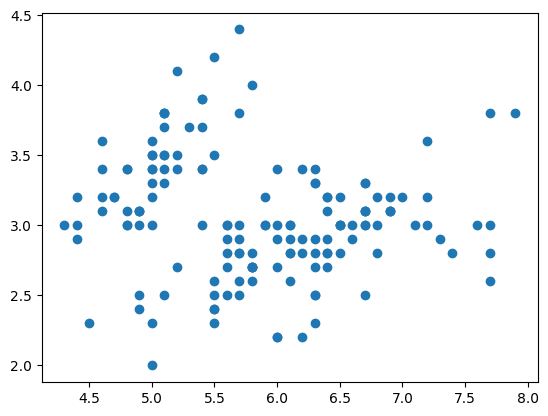

In [19]:
plt.scatter(X['sepal length'], X['sepal width'])

Definisce una mappa di colori per associare un colore a ciascuna classe Iris. Genera due scatter plot: uno per 'petal length' vs 'petal width' e uno per 'sepal length' vs 'sepal width'. I punti in entrambi i grafici sono colorati in base alla classe corrispondente usando la mappa di colori definita e viene applicata una trasparenza (alpha=0.5).

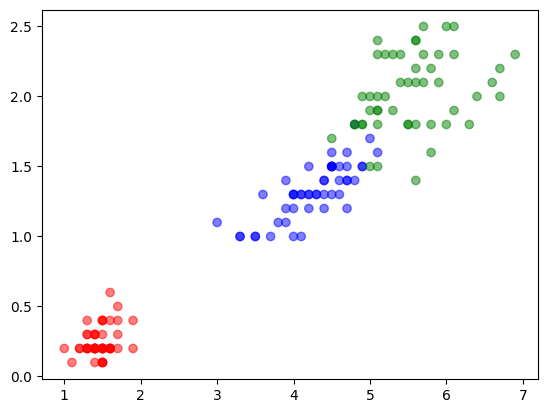

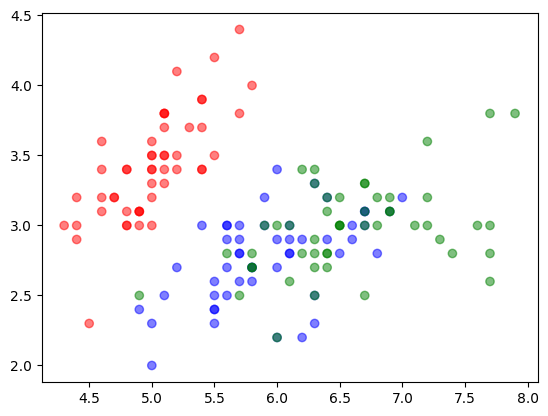

In [20]:
color_map = {'Iris-setosa': 'red',
             'Iris-versicolor': 'blue',
             'Iris-virginica': 'green'}

plt.scatter(X['petal length'], X['petal width'], c=y.map(color_map), alpha=0.5)
plt.show()
plt.scatter(X['sepal length'], X['sepal width'], c=y.map(color_map), alpha=0.5)
plt.show()

Utilizza la funzione `pairplot` di `seaborn` per creare una matrice di scatter plot per tutte le coppie di features presenti nel DataFrame originale (`iris.data.original`). I punti sono colorati in base alla colonna 'class'.

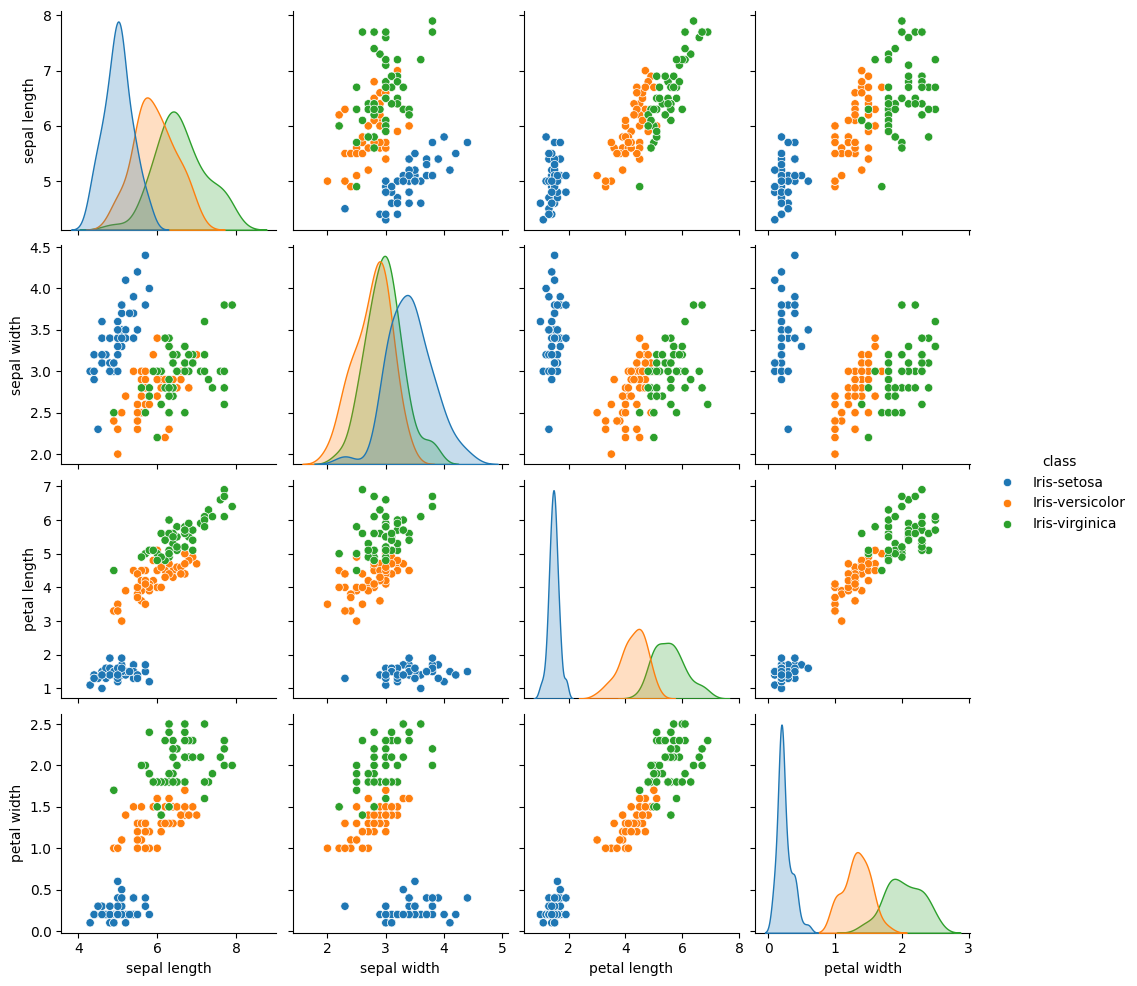

In [21]:
sns.pairplot(iris.data.original, hue='class')

Importa la libreria `numpy` e ne stampa la versione installata.

In [22]:
import numpy as np
np.__version__

'2.1.2'

Estrae i nomi unici delle classi dalla Series `y` e li memorizza nella variabile `class_names`.

In [23]:
class_names = y.unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Seleziona e visualizza le righe del DataFrame `X` che corrispondono alla classe 'Iris-setosa', utilizzando il boolean indexing basato sulla Series `y`.

In [24]:
X[y == 'Iris-setosa']

sepal length  sepal width  petal length  petal width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2
11           4.8          3.4           1.6          0.2
12           4.8          3.0           1.4          0.1
13           4.3          3.0           1.1          0.1
14           5.8          4.0           1.2          0.2
15           5.7          4.4           1.5          0.4
16           5.4          3.9           1.3          0.4
17           5.1          3.5           1.4          0.3
18           5.7          3.8           1.7          0.3
19           5.1          3.8           1.5          0.3
20           5.4          3.4           1.7          0.2
21           5.1          3.7           1.5          0.4
22           4.6          3.6           1.0          0.2
23           5.1          3.3           1.7          0.5
24           4.8          3.4           1.9          0.2
25           5.0          3.0           1.6          0.2
26           5.0          3.4           1.6          0.4
27           5.2          3.5           1.5          0.2
28           5.2          3.4           1.4          0.2
29           4.7          3.2           1.6          0.2
30           4.8          3.1           1.6          0.2
31           5.4          3.4           1.5          0.4
32           5.2          4.1           1.5          0.1
33           5.5          4.2           1.4          0.2
34           4.9          3.1           1.5          0.1
35           5.0          3.2           1.2          0.2
36           5.5          3.5           1.3          0.2
37           4.9          3.1           1.5          0.1
38           4.4          3.0           1.3          0.2
39           5.1          3.4           1.5          0.2
40           5.0          3.5           1.3          0.3
41           4.5          2.3           1.3          0.3
42           4.4          3.2           1.3          0.2
43           5.0          3.5           1.6          0.6
44           5.1          3.8           1.9          0.4
45           4.8          3.0           1.4          0.3
46           5.1          3.8           1.6          0.2
47           4.6          3.2           1.4          0.2
48           5.3          3.7           1.5          0.2
49           5.0          3.3           1.4          0.2

Crea un dizionario chiamato `dfs` utilizzando una dictionary comprehension. Ogni chiave del dizionario è un nome di classe (da `class_names`), e il valore associato è un DataFrame contenente solo le righe di `X` corrispondenti a quella classe.

In [25]:
dfs = {name: X[y == name] for name in class_names}
dfs

{'Iris-setosa':     sepal length  sepal width  petal length  petal width
 0            5.1          3.5           1.4          0.2
 1            4.9          3.0           1.4          0.2
 2            4.7          3.2           1.3          0.2
 3            4.6          3.1           1.5          0.2
 4            5.0          3.6           1.4          0.2
 5            5.4          3.9           1.7          0.4
 6            4.6          3.4           1.4          0.3
 7            5.0          3.4           1.5          0.2
 8            4.4          2.9           1.4          0.2
 9            4.9          3.1           1.5          0.1
 10           5.4          3.7           1.5          0.2
 11           4.8          3.4           1.6          0.2
 12           4.8          3.0           1.4          0.1
 13           4.3          3.0           1.1          0.1
 14           5.8          4.0           1.2          0.2
 15           5.7          4.4           1.5          0.4

Estrae i valori della colonna 'sepal width' per la classe 'Iris-setosa' dal dizionario `dfs`. Utilizza `np.unique` per ottenere i valori unici e le loro frequenze. Infine, crea un grafico a punti (`plt.plot` con 'o') per visualizzare le frequenze dei diversi valori di 'sepal width' per questa classe.

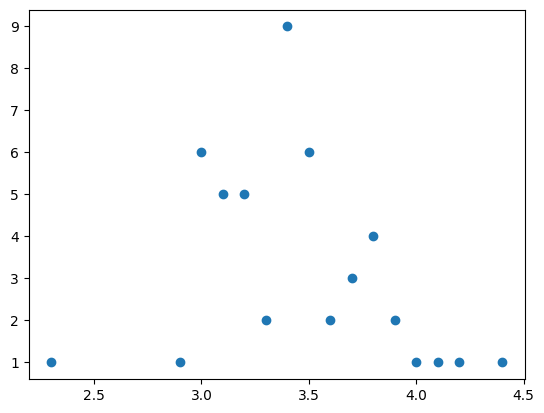

In [26]:
vals, freqs = np.unique(dfs['Iris-setosa']['sepal width'].values, return_counts=True)
plt.plot(vals, freqs, 'o')

Utilizza `fetch_ucirepo` per scaricare il dataset Abalone (ID 1) dal repository UCI.

In [27]:
abalone = fetch_ucirepo(id=1)

Visualizza i metadati associati al dataset Abalone.

In [28]:
abalone.metadata

{'uci_id': 1,
 'name': 'Abalone',
 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone',
 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv',
 'abstract': 'Predict the age of abalone from physical measurements',
 'area': 'Biology',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Tabular'],
 'num_instances': 4177,
 'num_features': 8,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': [],
 'target_col': ['Rings'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C55C7W',
 'creators': ['Warwick Nash',
  'Tracy Sellers',
  'Simon Talbot',
  'Andrew Cawthorn',
  'Wes Ford'],
 'intro_paper': None,
 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of r

Visualizza le prime righe del DataFrame originale del dataset Abalone, accessibile tramite `abalone.data.original`.

In [29]:
abalone.data.original

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

Genera una matrice di scatter plot (`pairplot` di seaborn) per il dataset Abalone originale. I punti sono colorati in base alla colonna 'Sex'.

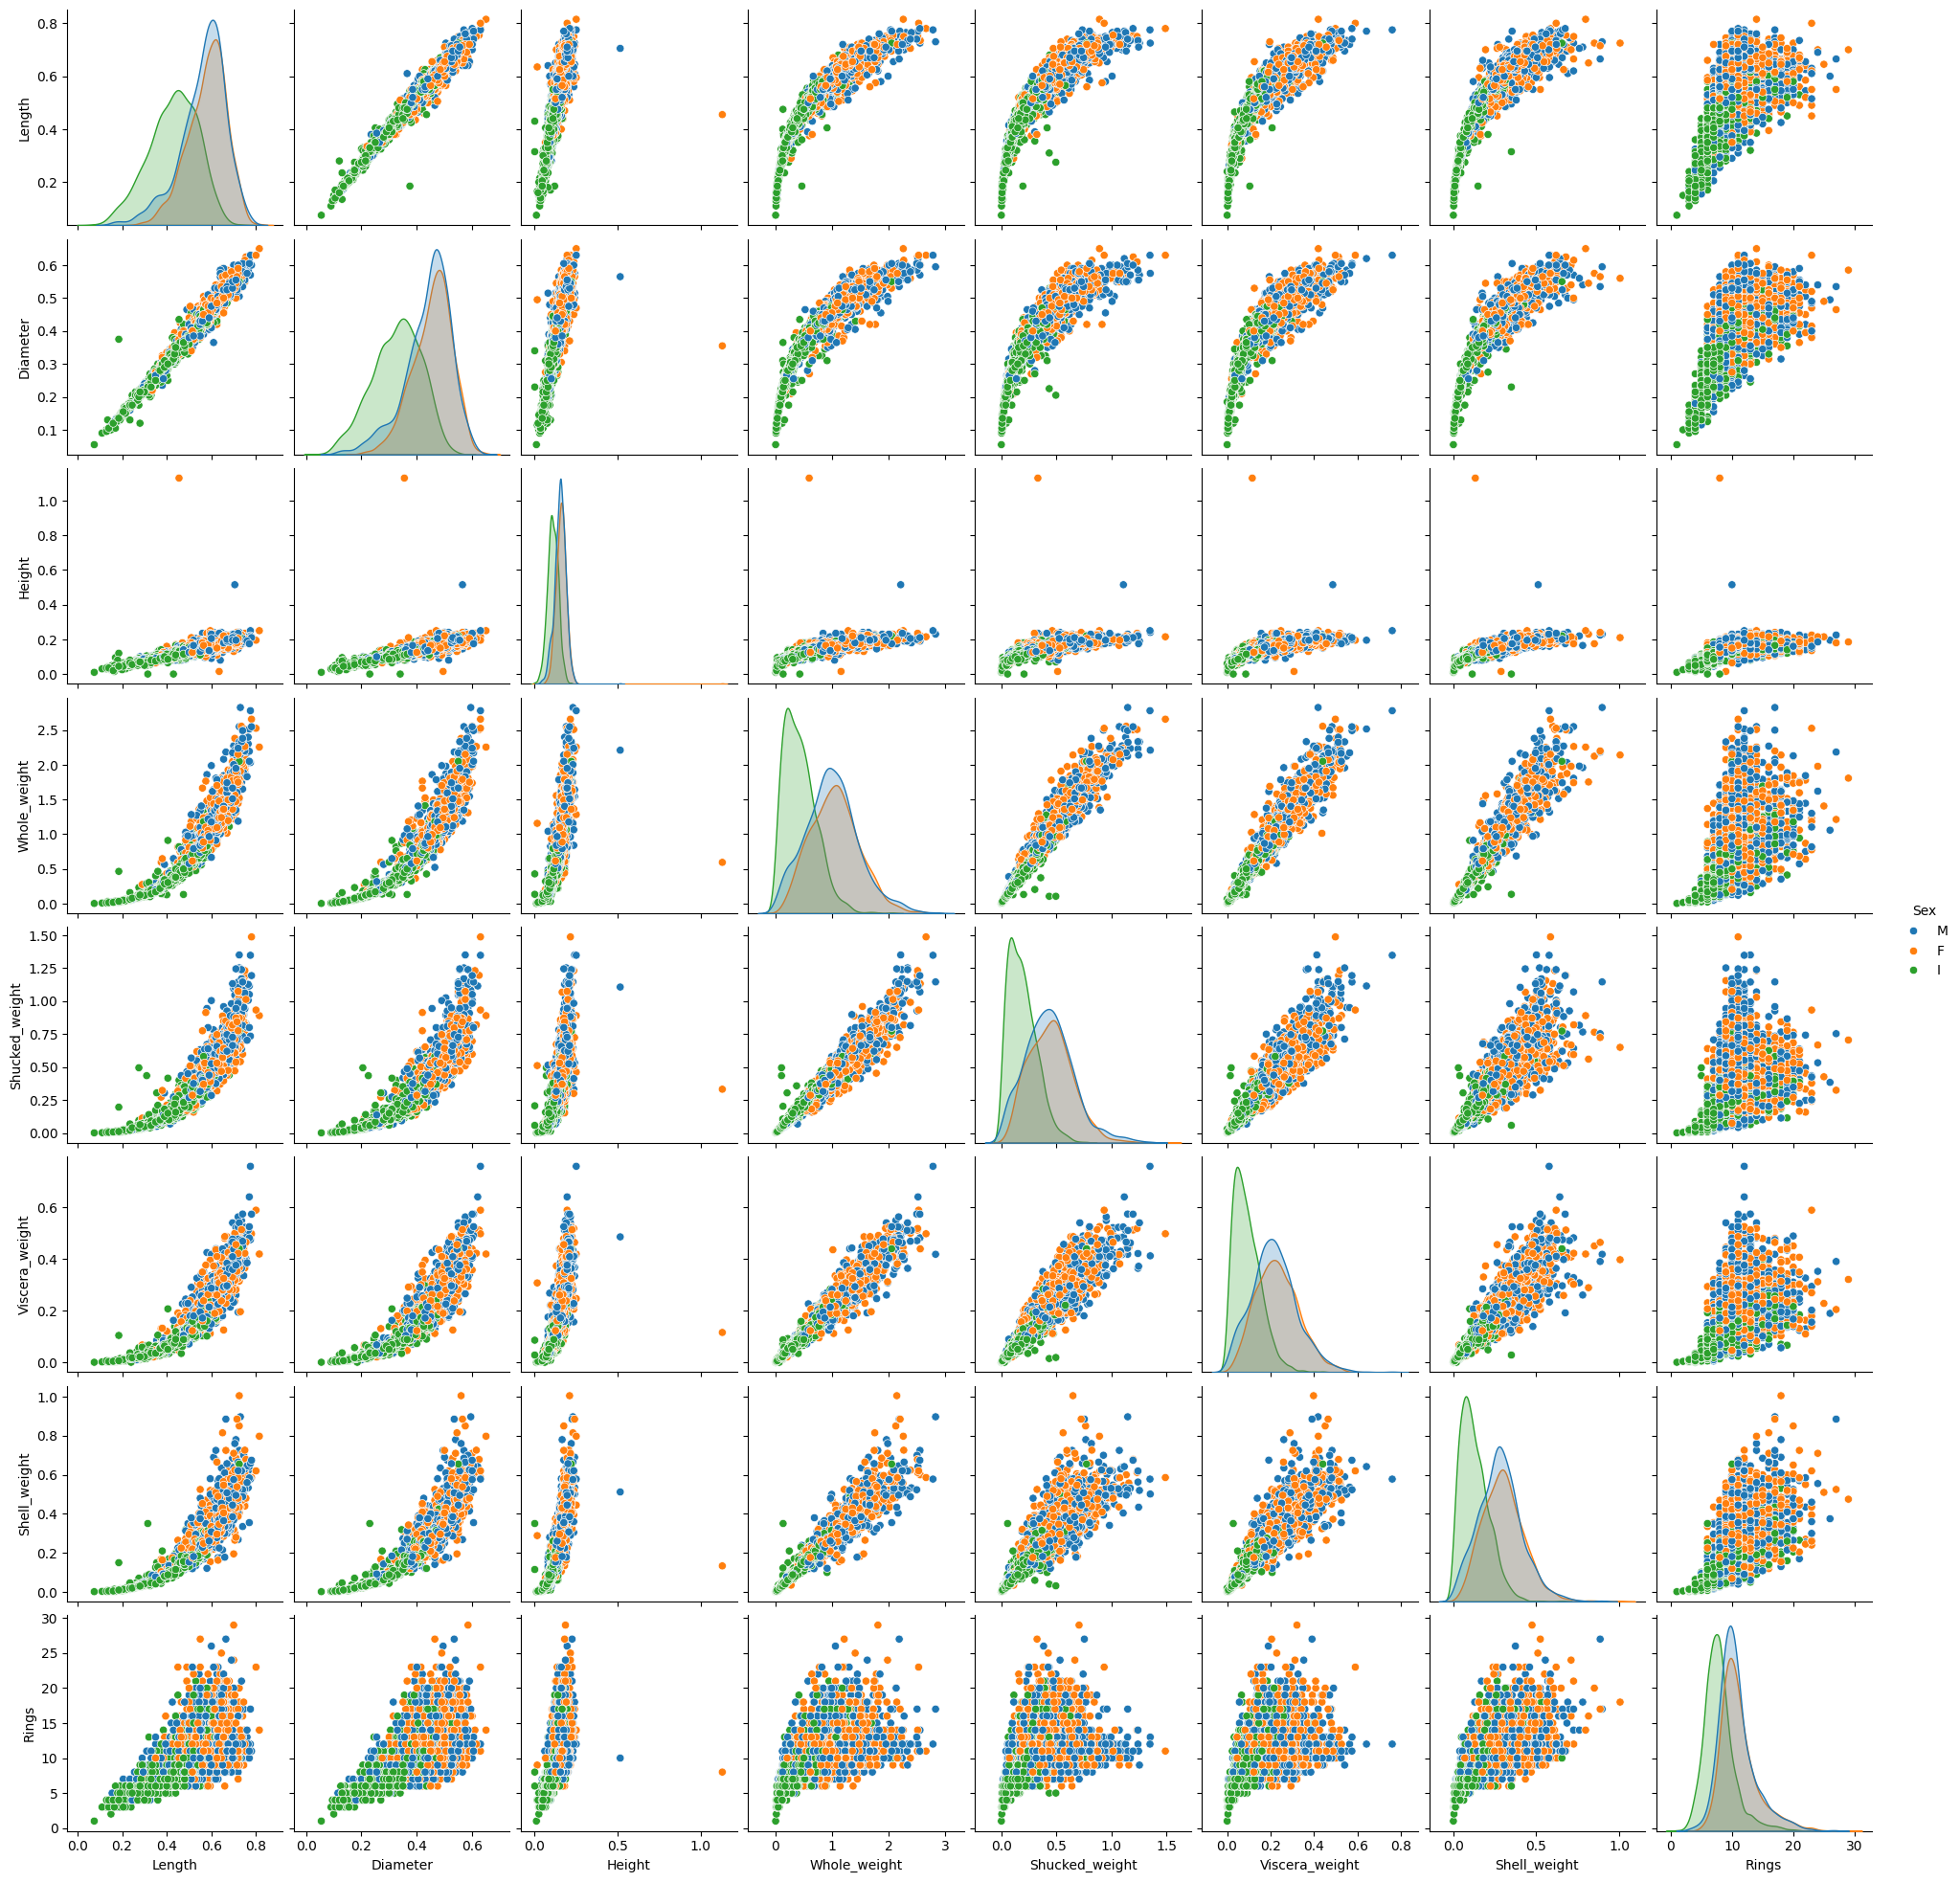

In [30]:
sns.pairplot(abalone.data.original, hue='Sex')

Qui ci sono degli outlier chiarissimi, sono pochi su tantissimi dati, quindi li togliamo senza dubbi

Assegna il DataFrame originale Abalone alla variabile `df`. Seleziona e visualizza le righe del DataFrame dove il valore della colonna 'Height' è maggiore di 0.5, identificandole come potenziali outlier.

In [31]:
df = abalone.data.original

df[df['Height'] > 0.5] # outliers


Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
1417   M   0.705     0.565   0.515         2.210          1.1075   
2051   F   0.455     0.355   1.130         0.594          0.3320   

      Viscera_weight  Shell_weight  Rings  
1417          0.4865        0.5120     10  
2051          0.1160        0.1335      8

Calcola e visualizza le statistiche descrittive (conteggio, media, deviazione standard, min, max, quartili) per le colonne numeriche del DataFrame `df`.

In [32]:
df.describe()

Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

Crea un nuovo DataFrame `dfc` (cleaned) filtrando il DataFrame `df` originale per mantenere solo le righe dove 'Height' è minore di 0.5, rimuovendo così gli outlier identificati.

In [33]:
dfc = df[df['Height'] < 0.5]

Genera una matrice di scatter plot (`pairplot`) per il DataFrame pulito `dfc`, colorando i punti in base alla colonna 'Sex'.

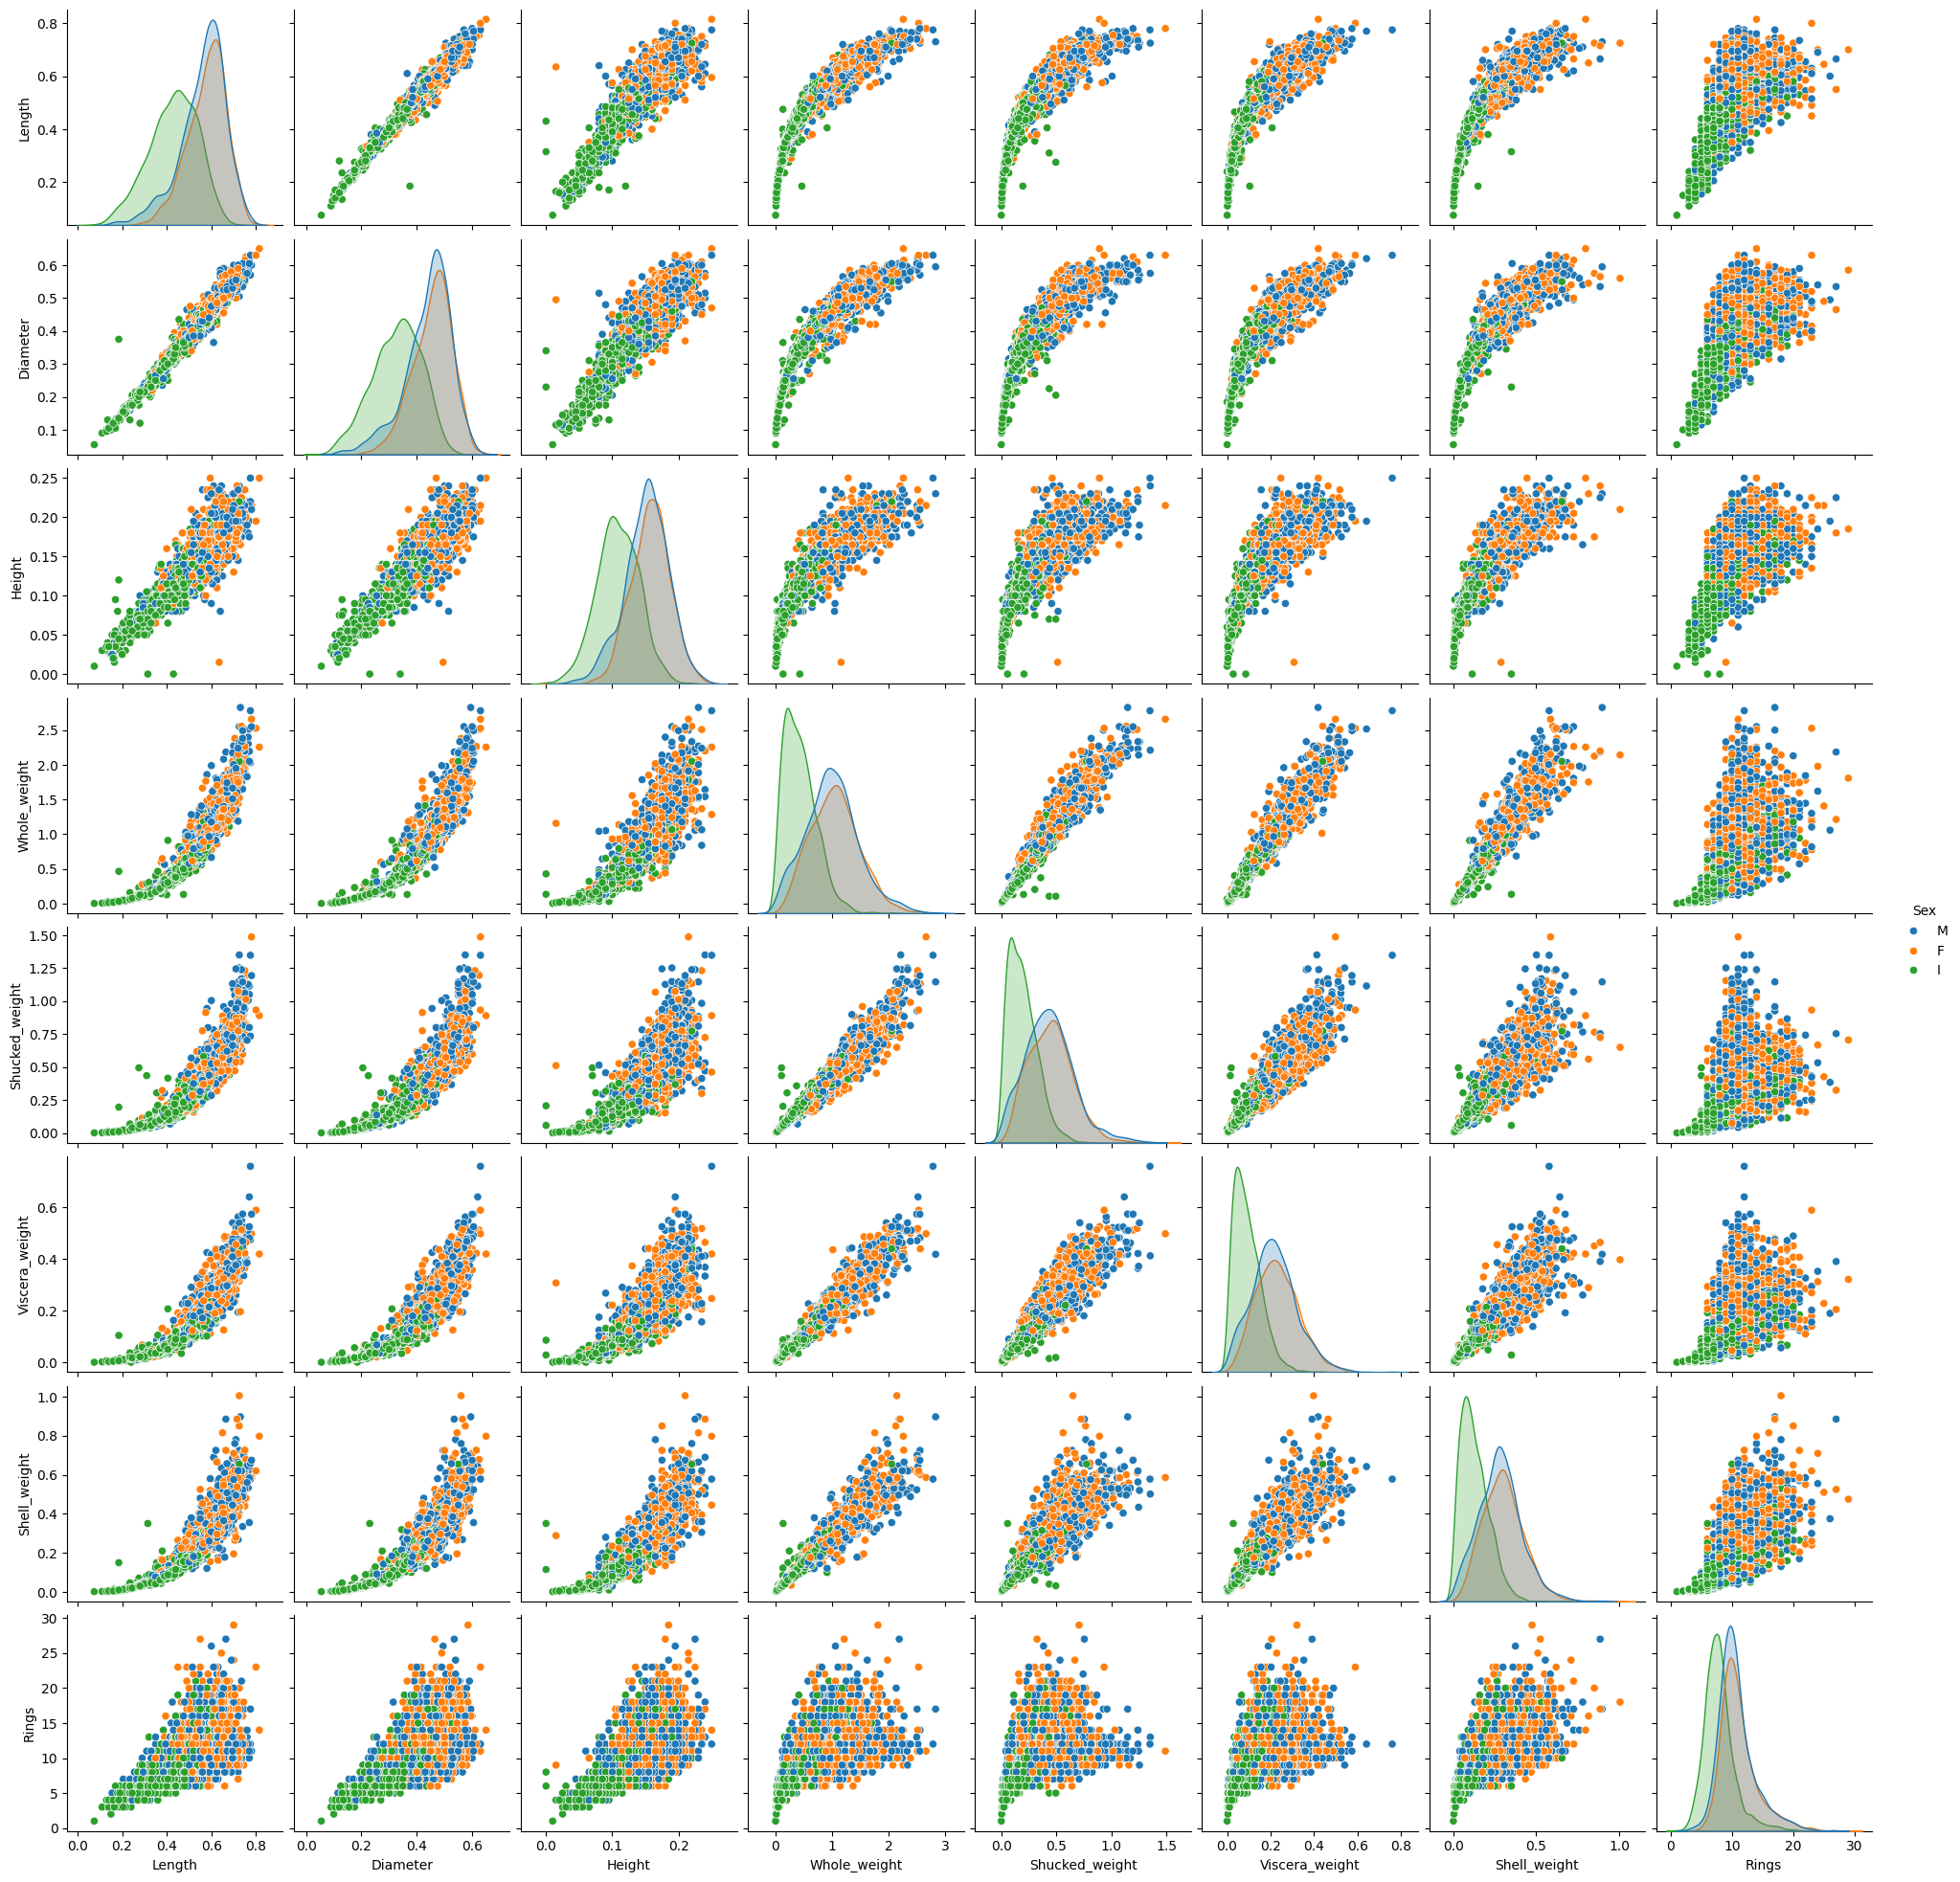

In [34]:
sns.pairplot(dfc, hue='Sex')

Calcola la differenza tra le colonne 'Length' e 'Diameter' per ogni riga del DataFrame originale `df`. Visualizza questa differenza in un grafico a punti per identificare potenziali ulteriori outlier (valori insoliti, specialmente quelli negativi).

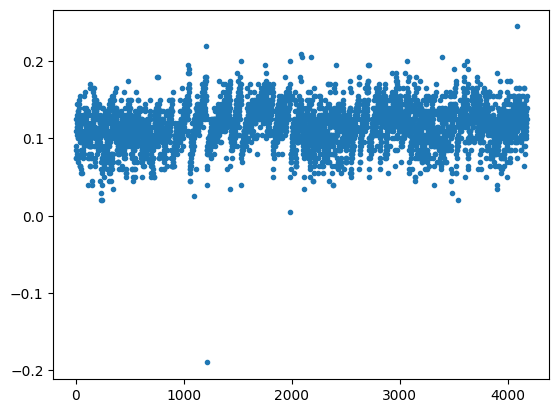

In [35]:
# rimuovo altri outliers
delta_size = df['Length'] - df['Diameter']
plt.plot(delta_size, '.')

Seleziona e visualizza le righe del DataFrame originale `df` dove la differenza calcolata `delta_size` (Length - Diameter) è negativa. Questi sono considerati outlier o errori di misurazione.

In [36]:
df[delta_size < 0]

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
1210   I   0.185     0.375    0.12        0.4645           0.196   

      Viscera_weight  Shell_weight  Rings  
1210          0.1045          0.15      6

Aggiorna il DataFrame `dfc` applicando un filtro combinato: mantiene solo le righe dove 'Height' è minore di 0.5 E la differenza `delta_size` (Length - Diameter) è maggiore di 0. Questo rimuove entrambi i tipi di outlier identificati.

In [37]:
dfc = df[(df['Height'] < 0.5) & (delta_size > 0)]

Genera una matrice di scatter plot (`pairplot`) per il DataFrame `dfc` dopo la seconda fase di pulizia, colorando i punti per 'Sex'.

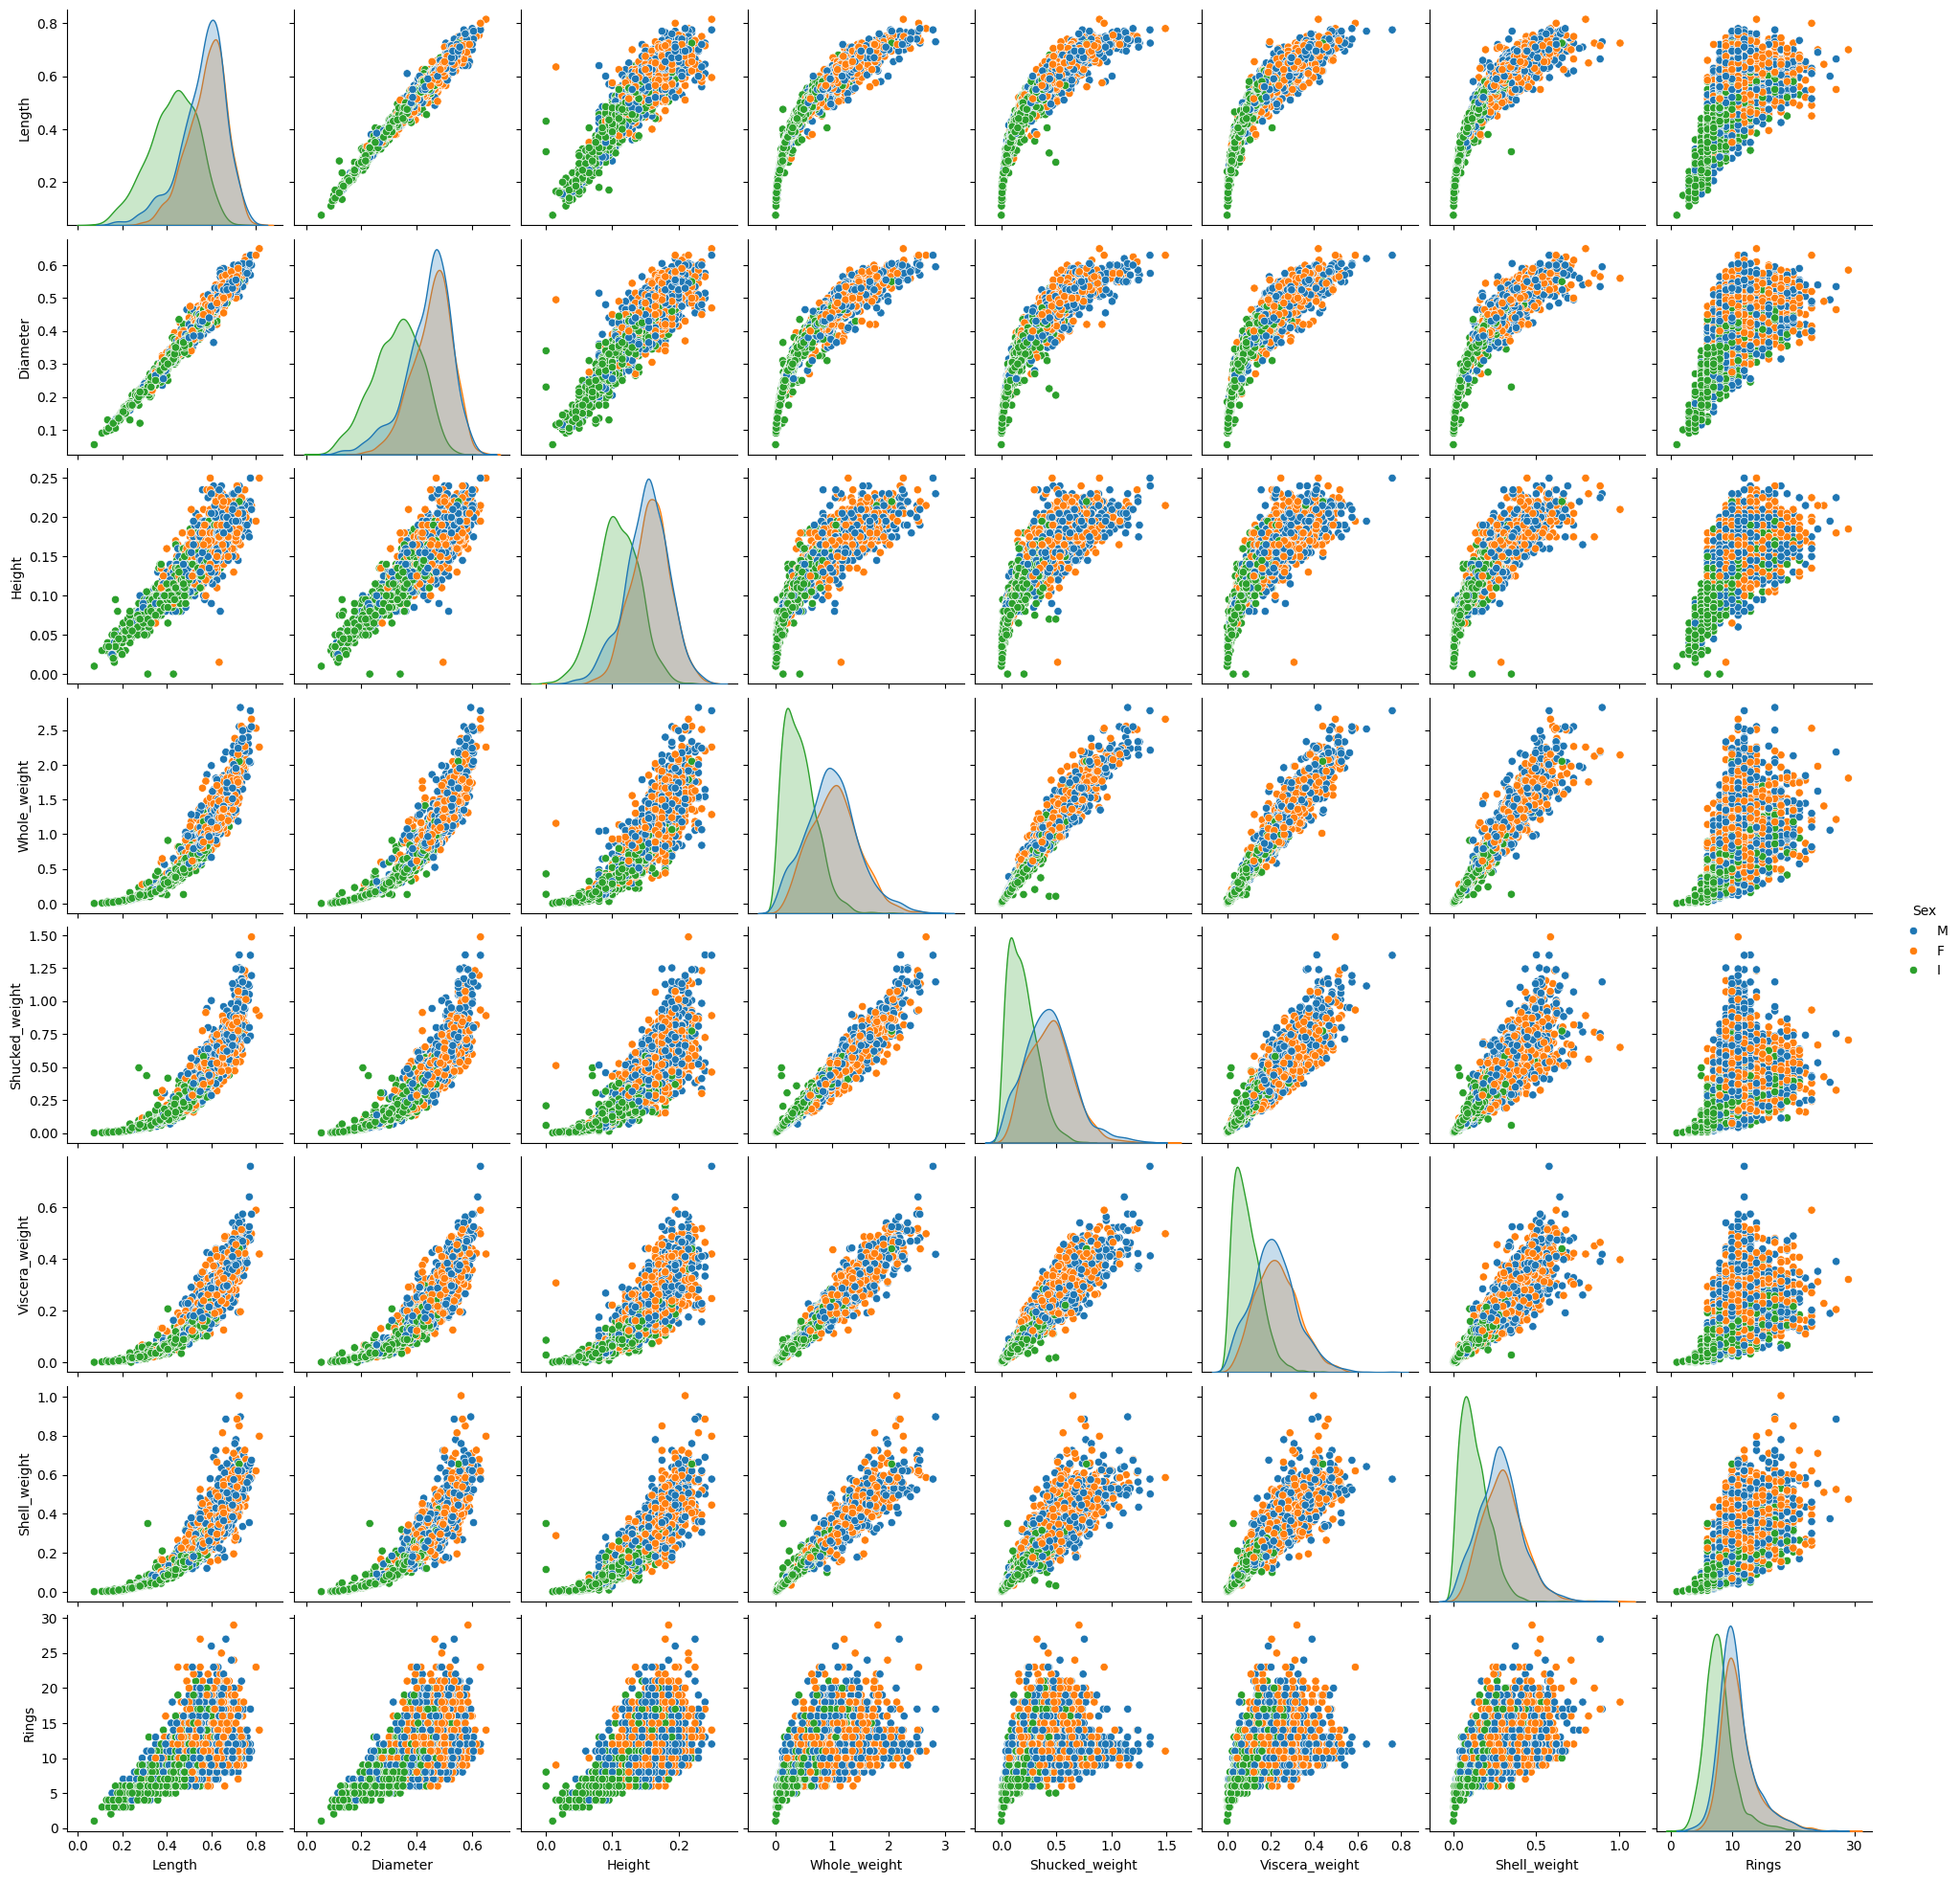

In [38]:
sns.pairplot(dfc, hue='Sex')

Crea una copia del DataFrame pulito `dfc` chiamata `dfc_transformed`. Seleziona tutte le colonne di tipo numerico da `dfc` e le memorizza in `numeric_cols`.

In [39]:
dfc_transformed = dfc.copy()
numeric_cols = dfc.select_dtypes(include=[np.number])
numeric_cols

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Rings  
0           0.1500     15  
1           0.0700      7  
2           0.2100      9  
3           0.1550     10  
4           0.0550      7  
...            ...    ...  
4172        0.2490     11  
4173        0.2605     10  
4174        0.3080      9  
4175        0.2960     10  
4176        0.4950     12  

[4174 rows x 8 columns]

Applica la trasformazione logaritmica (usando `np.log`) a tutte le colonne numeriche selezionate in `numeric_cols`. Aggiorna queste colonne nel DataFrame `dfc_transformed` con i valori trasformati.

In [40]:
# Faccio i logaritmi di tutte le variabili

dfc_transformed.loc[:, numeric_cols.columns] = numeric_cols.apply(np.log)
dfc_transformed

/tmp/ipykernel_9382/1969172908.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.7080502  1.94591015 2.19722458 ... 2.19722458 2.30258509 2.48490665]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfc_transformed.loc[:, numeric_cols.columns] = numeric_cols.apply(np.log)


Sex    Length  Diameter    Height  Whole_weight  Shucked_weight  \
0      M -0.787458 -1.007858 -2.353878     -0.665532       -1.493880   
1      M -1.049822 -1.328025 -2.407946     -1.489435       -2.307598   
2      F -0.634878 -0.867501 -2.002481     -0.390084       -1.360627   
3      M -0.820981 -1.007858 -2.079442     -0.661649       -1.534794   
4      I -1.108663 -1.366492 -2.525729     -1.584745       -2.413517   
...   ..       ...       ...       ...           ...             ...   
4172   F -0.570930 -0.798508 -1.801810     -0.119910       -0.994252   
4173   M -0.527633 -0.820981 -2.002481     -0.034591       -0.823256   
4174   M -0.510826 -0.744440 -1.584745      0.162119       -0.643405   
4175   F -0.470004 -0.723606 -1.897120      0.090298       -0.632993   
4176   M -0.342490 -0.588787 -1.634756      0.667060       -0.056041   

      Viscera_weight  Shell_weight     Rings  
0          -2.292635     -1.897120  2.708050  
1          -3.026191     -2.659260  1.945910  
2          -1.955456     -1.560648  2.197225  
3          -2.171557     -1.864330  2.302585  
4          -3.231455     -2.900422  1.945910  
...              ...           ...       ...  
4172       -1.431292     -1.390302  2.397895  
4173       -1.539446     -1.345152  2.302585  
4174       -1.246532     -1.177655  2.197225  
4175       -1.343235     -1.217396  2.302585  
4176       -0.976837     -0.703198  2.484907  

[4174 rows x 9 columns]

Genera una matrice di scatter plot (`pairplot`) per il DataFrame trasformato `dfc_transformed`, colorando i punti per 'Sex'. Questo aiuta a visualizzare l'effetto della trasformazione logaritmica sulle relazioni tra le variabili.

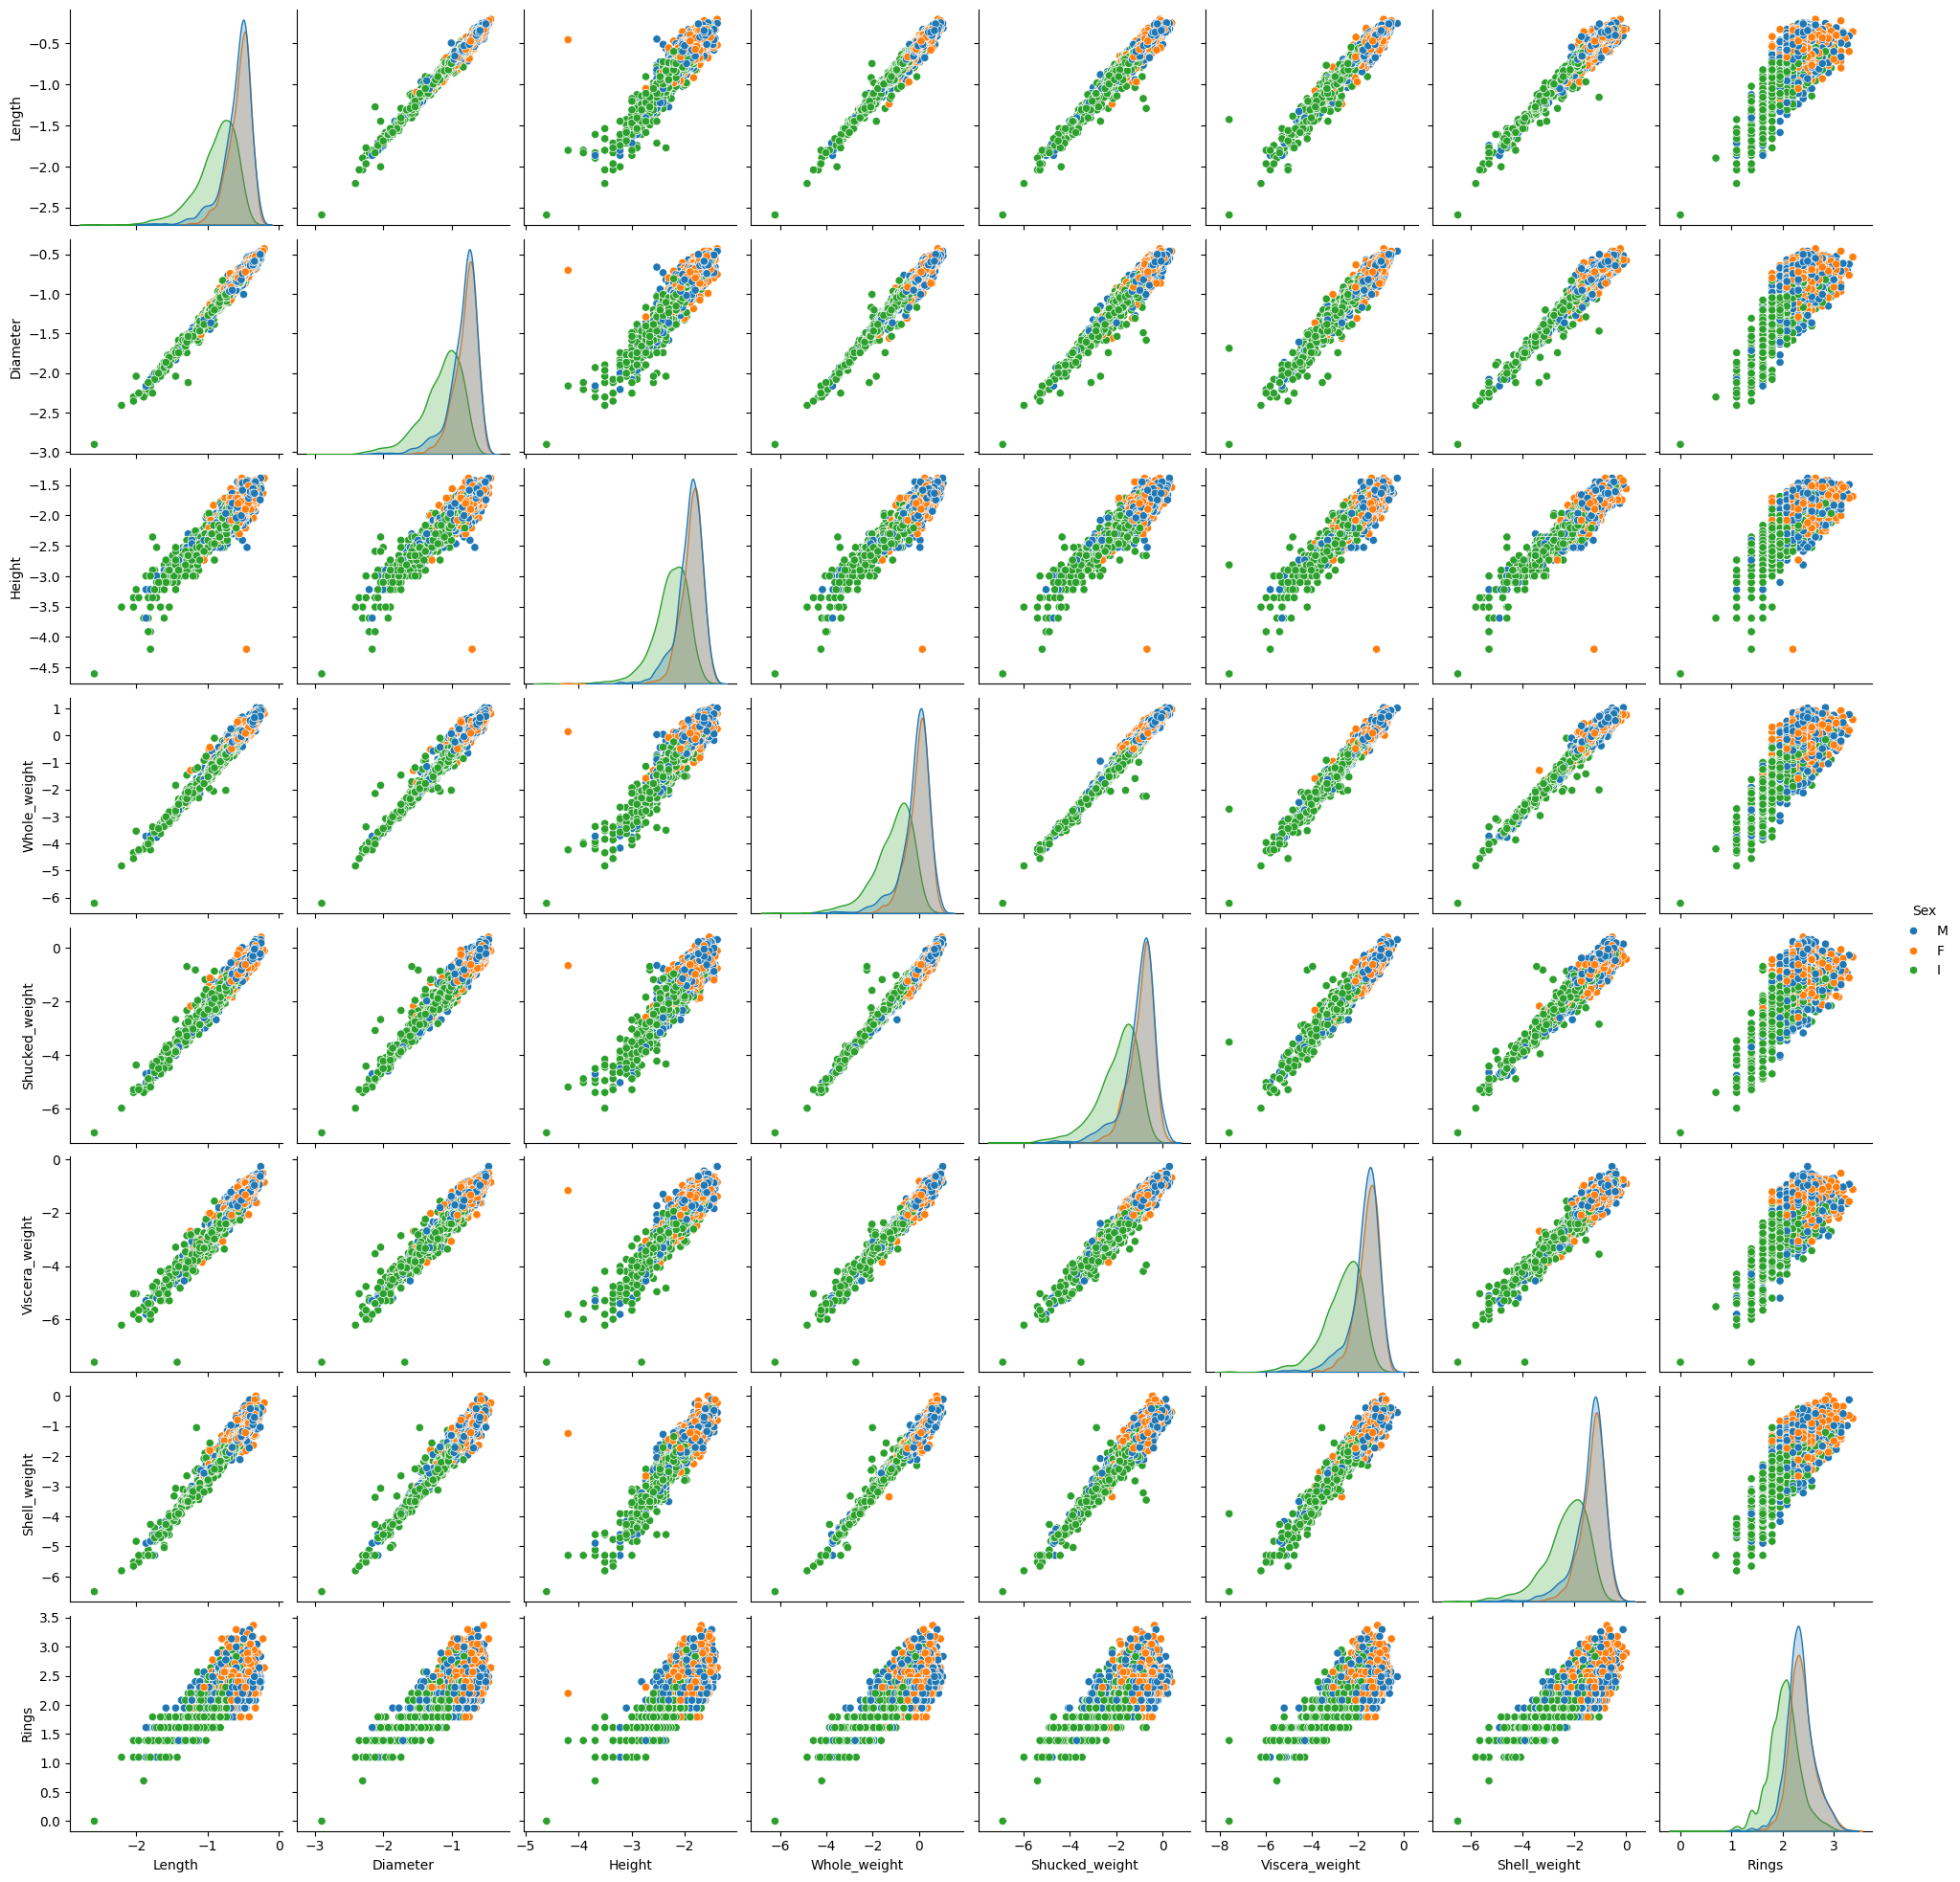

In [41]:
sns.pairplot(dfc_transformed, hue='Sex')

Importa la classe `PCA` (Principal Component Analysis) da `sklearn.decomposition`. Inizializza un oggetto `PCA` specificando che si desidera ridurre la dimensionalità a 2 componenti principali (`n_components=2`).

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)